In [1]:
%matplotlib inline
# to be run on jeff's laptop
import pylabs
pylabs.datadir.target = 'jaba'
from pathlib import *
import os
import numpy as np
import pandas as pd
import nibabel as nib
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from pylabs.utils import getnetworkdataroot
fs = Path(getnetworkdataroot())

setting root data directory to jaba.


In [2]:
os.chdir(str(fs.parent/'scaling_issue'))
os.listdir(os.getcwd())

OSError: [Errno 2] No such file or directory: '/brainstudio/scaling_issue'

In [3]:
nbwr144_mpr_rms = nib.load('sub-nbwr144_ses-1_fsmempr_ti1100_rms_1.nii').get_data()
nbwr144_dwi = nib.load('sub-nbwr144_ses-1_dwi-topup_64dir-3sh-800-2000_1_topdn_unwarped_ec_mf_clamp1.nii.gz').get_data()
nbwr144_fa05 = nib.load('sub-nbwr144_ses-1_spgr_fa-05-tr-12p0_1.nii').get_data()
nbwr144_fa30 = nib.load('sub-nbwr144_ses-1_spgr_fa-30-tr-12p0_1.nii').get_data()
acdc103_mpr_rms = nib.load('sub-acdc103_ses-1_fsmempr_ti1400_rms_1.nii').get_data()
acdc103_dwi = nib.load('sub-acdc103_ses-1_dwi-topup_64dir-3sh-800-2000_1.nii').get_data()
acdc103_vfa = nib.load('sub-acdc103_ses-1_vfa_fa-4-25-tr-21p0_1.nii').get_data()
acdc112_vfa = nib.load(str(fs/'acdc/sub-acdc112/ses-1/qt1/sub-acdc112_ses-1_vfa_fa-4-25-tr-21p0_1.nii')).get_data()

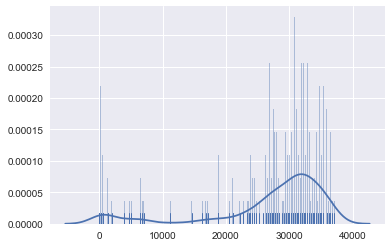

In [4]:
sns.distplot(nbwr144_fa05[:,107,128], bins=256, rug=True, hist_kws={'range': (1, 40000)},\
            kde_kws={'clip': (1, 40000)})

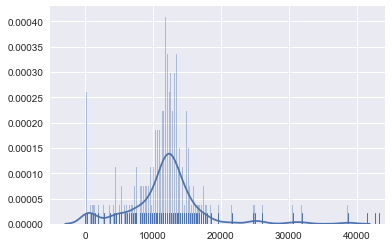

In [5]:
sns.distplot(nbwr144_fa30[:,107,128], bins=256, rug=True, hist_kws={'range': (1, 40000)},\
            kde_kws={'clip': (1, 40000)})

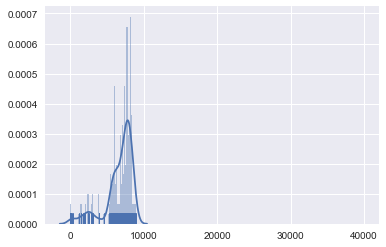

In [6]:
sns.distplot(acdc103_vfa[:, 183, 193, 0], bins=256, rug=True, hist_kws={'range': (1, 40000)},\
            kde_kws={'clip': (1, 40000)})

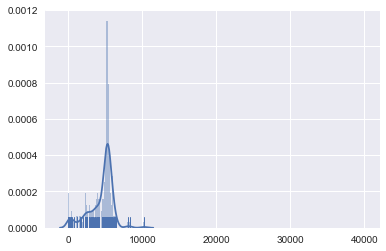

In [7]:
sns.distplot(acdc103_vfa[:, 183, 193, 3], bins=256, rug=True, hist_kws={'range': (1, 40000)},\
            kde_kws={'clip': (1, 40000)})